# Task 4:Stock Market Prediction and Forecasting Using LSTM

# By: Paras Rawat



##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Reading Data

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.shape

(2035, 8)

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [ ]:
df_turnover = df["Turnover (Lacs)"]

In [ ]:
df_turnover.shape

(2035,)

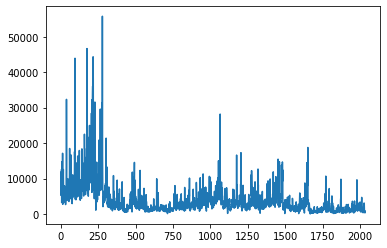

In [ ]:
plt.plot(df_turnover)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_turnover = scaler.fit_transform(np.array(df_turnover).reshape(-1,1))

In [ ]:
df_turnover.shape

(2035, 1)

## Training data

In [ ]:
training_size = int(len(df_turnover)*0.75)
test_size=len(df_turnover) - training_size
train_data, test_data = df_turnover[0:training_size,:], df_turnover[training_size:len(df_turnover),:1]

In [ ]:
def new_df(dataset,time_step = 1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = new_df(train_data,time_step)
x_test, y_test = new_df(test_data,time_step)

In [ ]:
#Reshape the new input which is require for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

## Creating LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer = "adam")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,verbose=1,epochs=100)

Epoch 1/100
23/23 [==============================] - 17s 418ms/step - loss: 0.0063 - val_loss: 0.0014
Epoch 2/100
23/23 [==============================] - 9s 378ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 9s 377ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 4/100
23/23 [==============================] - 9s 380ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 9s 382ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 9s 378ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 9s 374ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 9s 380ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 9s 375ms/step - loss: 0.0044 - val_loss: 0.0014
Epoch 10/100
23/23 [==============================] - 9s 377ms/step - loss: 0.0046 - val_l

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
# Back To Original Form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE On Training Data
math.sqrt(mean_squared_error(y_train, train_predict))

5550.683477110148

In [ ]:
# Calculate RMSE On Testing Data
math.sqrt(mean_squared_error(y_test, test_predict))

1855.3540243878817

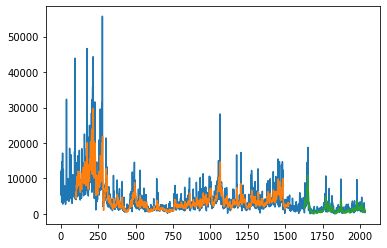

In [ ]:
# Training Prediction For Plotting
look_back = 100
trainPredictPlot = np.empty_like(df_turnover)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

# Testing Prediction For Plotting
testPredictPlot = np.empty_like(df_turnover)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_turnover)-1,:]=test_predict

# Ploting Baseline And Prediction
plt.plot(scaler.inverse_transform(df_turnover))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [ ]:
len(test_data),x_test.shape

(509, (408, 100, 1))

In [ ]:
x_input =test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [ ]:
temp_input=list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=301
nextNOD=30
i=0
while(i<nextNOD):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

0 day input [0.03100773 0.01530079 0.0095452  0.01300943 0.02771993 0.02462398
 0.01612548 0.00864226 0.00763308 0.03609405 0.00707922 0.00772371
 0.01824867 0.01178721 0.02969559 0.01450805 0.01799435 0.02972359
 0.0180683  0.01723912 0.02447825 0.02437397 0.02650757 0.05527779
 0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.037

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
dx = df_turnover.tolist()
dx.extend(lst_output)

In [ ]:
len(df_turnover)

2035